In [2]:
import argparse  
from code_part1 import foo
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Part 1

### 1A and 1B

100


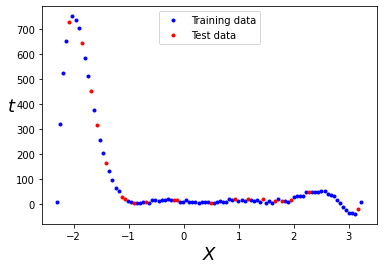

In [397]:
df = pd.read_csv("1B.csv", header=None) 
# df = df.sample(n = len(df))
df = df.sample(frac=1)
print(len(df))
train_df = df[:int(0.8*len(df))]
test_df = df[int(0.8*len(df)):]
# Convert everything to a numpy array, as it makes my life easy. Works pretty much like MATLAB after that
train_X = np.array(train_df.values)[:, 0:1]
train_y = np.array(train_df.values)[:, 1:]
test_X = np.array(test_df.values)[:, 0:1]
test_y = np.array(test_df.values)[:, 1:2]

plt.plot(train_X, train_y, "b.", label="Training data")
plt.plot(test_X, test_y, "r.", label="Test data")
plt.legend(loc="upper center")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$t$", rotation=0, fontsize=18)
plt.savefig('given_data_plot_1A_20.png')
plt.show()

# Pinv

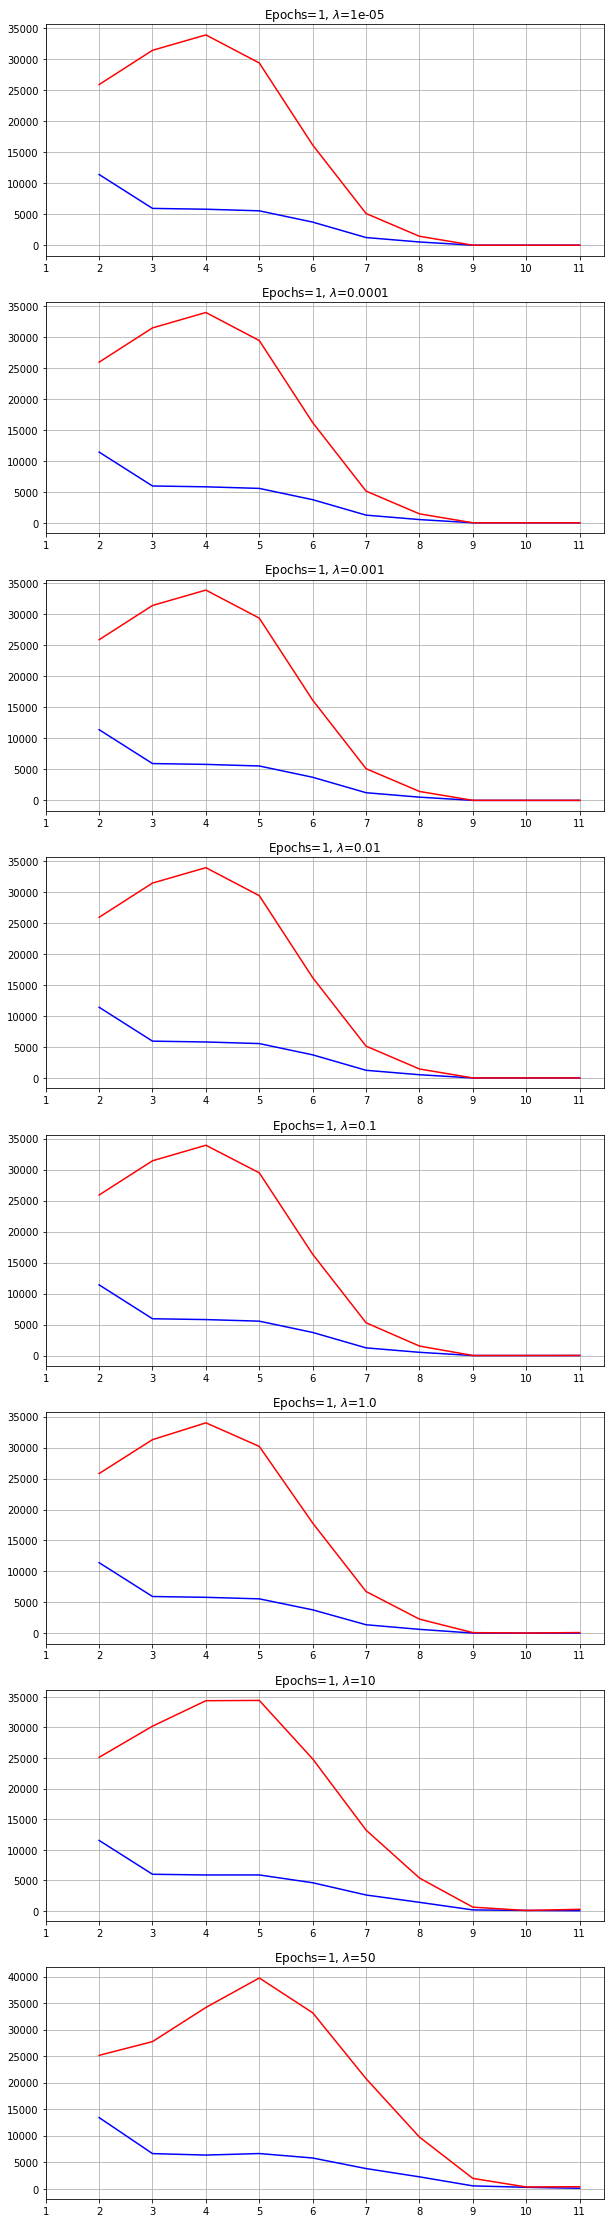

In [353]:
temp_X_train = train_X
X_new_train = train_X

temp_X_test = test_X
X_new_test = test_X

M = np.arange(2,12)
# lamb = 0.1

# for m in M:
#     temp_X_train = temp_X_train*train_X
#     X_new_train = np.c_[X_new_train, temp_X_train]
#     X_fin = np.c_[np.ones((len(X_new_train), 1)), X_new_train]
#     theta_best = np.linalg.inv((lamb*np.identity(m+1)) + X_fin.T.dot(X_fin)).dot(X_fin.T).dot(train_y)
#     y_hat = X_fin.dot(theta_best)
#     plt.plot(train_X, y_hat, "r.")
#     plt.plot(train_X, train_y, "b.")
#     plt.show()

lambs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 50]
# lambs = np.logspace(-200, -1, num=20)
# lambs = [1e-50, 1e-20, 1e-10, 1e-5, 1e-3]
# EPOCHS = [1, 10, 50, 100]
EPOCHS = [1]
# EPOCHS = [1, 3, 5, 7, 9]

figure, axes = plt.subplots(ncols=len(EPOCHS), nrows=len(lambs), figsize=(10,40))

for idx_ep, n_epochs in enumerate(EPOCHS):
    for idx_lm, lamb in enumerate(lambs):
        E_rms_train = []
        E_rms_test = []
        minerr = 1e4

        temp_X_train = train_X
        X_new_train = train_X

        temp_X_test = test_X
        X_new_test = test_X

        for m in M:
            temp_X_train = temp_X_train*train_X
            X_new_train = np.c_[X_new_train, temp_X_train]
            X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]
            theta_best1 = np.linalg.pinv(X_fin_train).dot(train_y)
            theta_best = np.linalg.inv((lamb*np.identity(m+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)
            y_hat_train = X_fin_train.dot(theta_best)
            temp_val_train = sum((y_hat_train-train_y)**2)
            temp_val_train/=len(train_y)
            E_rms_train.append(temp_val_train)

            temp_X_test = temp_X_test*test_X
            X_new_test = np.c_[X_new_test, temp_X_test]
            X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]
            y_hat_test = X_fin_test.dot(theta_best)
            temp_val_test = sum((y_hat_test-test_y)**2)
            temp_val_test/=len(test_y)
            E_rms_test.append(temp_val_test) 

#         axes[idx_ep, idx_lm].plot(M, E_rms_train, "b-", label="Training Error")
#         axes[idx_ep, idx_lm].plot(M, E_rms_test, "r-", label="Test Error")
#         xticks = np.arange(1, max(M)+1, 1)
#         axes[idx_ep, idx_lm].set_xticks(xticks)
#         axes[idx_ep, idx_lm].grid()
#         axes[idx_ep, idx_lm].set_title(r"Epochs=%s, $\lambda$=%s"%(n_epochs, lamb))
        axes[idx_lm].plot(M, E_rms_train, "b-", label="Training Error")
        axes[idx_lm].plot(M, E_rms_test, "r-", label="Test Error")
        xticks = np.arange(1, max(M)+1, 1)
        axes[idx_lm].set_xticks(xticks)
        axes[idx_lm].grid()
        axes[idx_lm].set_title(r"Epochs=%s, $\lambda$=%s"%(n_epochs, lamb))

#         print("Training error at m=5 = %s, Test error = %s"%(E_rms_train, E_rms_test))
# figure.legend(('Training Error', 'Test Error'), 'upper left')
plt.savefig('epoch_lambda_100.png')
plt.show() 

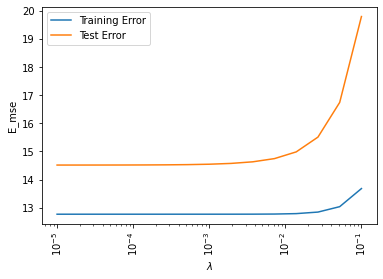

In [362]:
temp_X_train = train_X
X_new_train = train_X

temp_X_test = test_X
X_new_test = test_X

lambs = np.logspace(-5, -1, num=15)

for m in range(2, 10):
    temp_X_train = temp_X_train*train_X
    X_new_train = np.c_[X_new_train, temp_X_train]
    temp_X_test = temp_X_test*test_X
    X_new_test = np.c_[X_new_test, temp_X_test]


X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    
X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]

E_rms_train = []
E_rms_test = []

for lamb in lambs:

        theta_best = np.linalg.inv((lamb*np.identity(m+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)
        y_hat_train = X_fin_train.dot(theta_best)
        temp_val_train = sum((y_hat_train-train_y)**2)
        temp_val_train/=len(train_y)
        E_rms_train.append(temp_val_train)

        y_hat_test = X_fin_test.dot(theta_best)
        temp_val_test = sum((y_hat_test-test_y)**2)
        temp_val_test/=len(test_y)
        E_rms_test.append(temp_val_test) 

plt.xscale("log")
plt.plot(lambs, E_rms_train, label="Training Error")
plt.plot(lambs, E_rms_test, label="Test Error")
plt.legend(loc="upper left")
# xticks = np.logspace(-20, -1, num=20)
plt.xticks(np.logspace(-5, -1, num=5), rotation=90)
plt.xlabel("$\lambda$")
plt.ylabel("E_mse")
# plt.savefig('something for 20.png')
plt.show() 


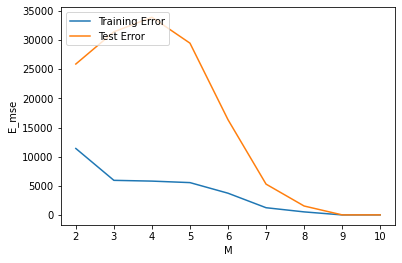

In [355]:
temp_X_train = train_X
X_new_train = train_X

temp_X_test = test_X
X_new_test = test_X

# lambs = np.logspace(-5, 1, num=7)
lamb = 0.1
M = np.arange(2, 11, 1)
E_rms_train = []
E_rms_test = []

for m in M:
    temp_X_train = temp_X_train*train_X
    X_new_train = np.c_[X_new_train, temp_X_train]
    temp_X_test = temp_X_test*test_X
    X_new_test = np.c_[X_new_test, temp_X_test]


    X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    
    X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]

# for lamb in lambs:

    theta_best = np.linalg.inv((lamb*np.identity(m+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)
    y_hat_train = X_fin_train.dot(theta_best)
    temp_val_train = sum((y_hat_train-train_y)**2)
    temp_val_train/=len(train_y)
    E_rms_train.append(temp_val_train)

    y_hat_test = X_fin_test.dot(theta_best)
    temp_val_test = sum((y_hat_test-test_y)**2)
    temp_val_test/=len(test_y)
    E_rms_test.append(temp_val_test) 

# plt.xscale("log")
# plt.plot(lambs, E_rms_train, label="Training Error")
# plt.plot(lambs, E_rms_test, label="Test Error")
plt.plot(M, E_rms_train, label="Training Error")
plt.plot(M, E_rms_test, label="Test Error")
plt.legend(loc="upper left")
# xticks = np.logspace(-20, -1, num=20)
# plt.xticks(lambs, rotation=90)
plt.xticks(M)
# plt.xlabel("$\eta$")
plt.xlabel("M")
plt.ylabel("E_mse")
# plt.savefig('something for 20.png')
plt.show() 

[11.12595983] [-19.75166539] [3.54778745] [75.00030169] [-33.45014294] [-56.60566459] [37.73004886] [3.02620401] [-5.93808214] [0.97849333]


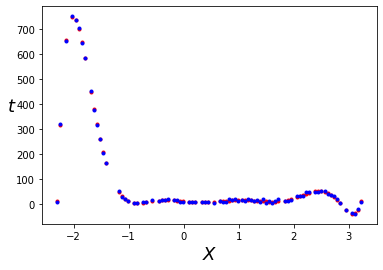

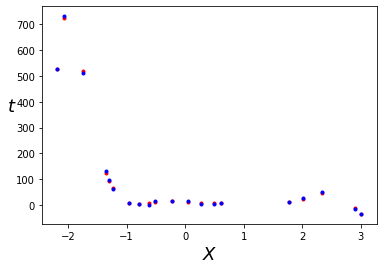

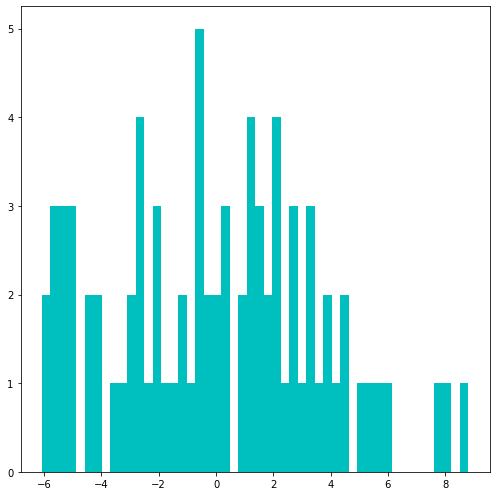

In [396]:
X_new_train = train_X
temp_X_train = train_X
X_new_test = test_X
temp_X_test = test_X
for m in range(2, 10, 1):
    temp_X_train = temp_X_train*train_X
    X_new_train = np.c_[X_new_train, temp_X_train]
    temp_X_test = temp_X_test*test_X
    X_new_test = np.c_[X_new_test, temp_X_test]
    
X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    
X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]    
lamb=0.1
theta_best = np.linalg.inv((lamb*np.identity(m+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)
print(*theta_best)

plt.plot(train_X, X_fin_train.dot(theta_best), 'r.')
plt.plot(train_X, train_y, 'b.')
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$t$", rotation=0, fontsize=18)
plt.show()

plt.plot(test_X, X_fin_test.dot(theta_best), 'r.')
plt.plot(test_X, test_y, 'b.')
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$t$", rotation=0, fontsize=18)
plt.show()

yy = train_y - X_fin_train.dot(theta_best)
n_bins = 50
fig, axs = plt.subplots(1, 1,figsize =(7, 7),tight_layout = True)
axs.hist(yy, bins = n_bins, color='c')

plt.show()

In [300]:
Y_hat = X_fin_train.dot(theta_best)
YY = train_y - Y_hat
YY = YY*YY
print(YY[:5])
np.mean(YY)

[[3.08805456e-03]
 [1.09044770e-03]
 [1.60023191e-04]
 [3.31946778e-07]
 [6.36156060e-04]]


0.006940360733959994

# Rough Work

In [92]:
# print(X[:10])
X_temp = X
tt = [i ** 2 for i in X_temp]
# print(tt[:10])
nen = np.c_[X_temp, tt]
# pp = tt*X
# nen = np.array([nen, pp])
# print(nen)

X_b = np.c_[np.ones((100, 1)), nen]  # add x0 = 1 to each instance
# X_b = nen
print(X_b[:5])
theta_best = np.linalg.pinv(X_b).dot(y)
y_predict = X_b.dot(theta_best)
plt.plot(X, y_predict, "r.")
plt.plot(X, y, "b.")
# plt.axis([0, 2, 0, 15])
plt.show()

# Gradient Descent

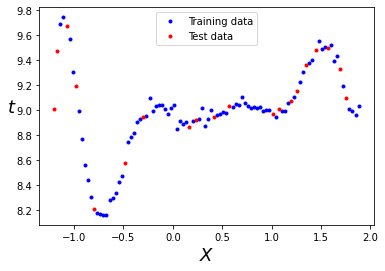

In [330]:
df = pd.read_csv("1A.csv", header=None)
# df = df.sample(n = len(df))
df = df.sample(n=100)
# train_df = df[:int(0.8*len(df))].sample(frac=1.0)
# test_df = df[int(0.8*len(df)):].sample(frac=1.0)
# # Convert everything to a numpy array, as it makes my life easy. Works pretty much like MATLAB after that
# train_X = np.array(train_df.values)[:, 0:1]
# train_y = np.array(train_df.values)[:, 1:]
# test_X = np.array(test_df.values)[:, 0:1]
# test_y = np.array(test_df.values)[:, 1:]

# plt.plot(train_X, train_y, "b.", label="Training data")
# plt.plot(test_X, test_y, "r.", label="Test data")
# plt.legend(loc="upper center")
# plt.xlabel("$X$", fontsize=18)
# plt.ylabel("$t$", rotation=0, fontsize=18)
# plt.savefig('given_data_plot_1A_20.png')
# plt.show()




data = np.array(df.values)
# norm = np.linalg.norm(data[:, 0:1])
# data[:, 0:1] = data[:, 0:1]/norm
# v = data[:, 0:1]
# kk = ((v - v.min()) / (v.max() - v.min()))
# data[:, 0:1] = kk - np.mean(kk)
# Convert everything to a numpy array, as it makes my life easy. Works pretty much like MATLAB after that
train_split = 0.8
train_X_st = data[:int(train_split*len(df)), 0:1]
train_y_st = data[:int(train_split*len(df)), 1:]
test_X_st = data[int(train_split*len(df)):, 0:1]
test_y_st = data[int(train_split*len(df)):, 1:]


plt.plot(train_X_st, train_y_st, "b.", label="Training data")
plt.plot(test_X_st, test_y_st, "r.", label="Test data")
plt.legend(loc="upper center")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$t$", rotation=0, fontsize=18)
plt.savefig('given_data_plot_1A_20.png')
plt.show()

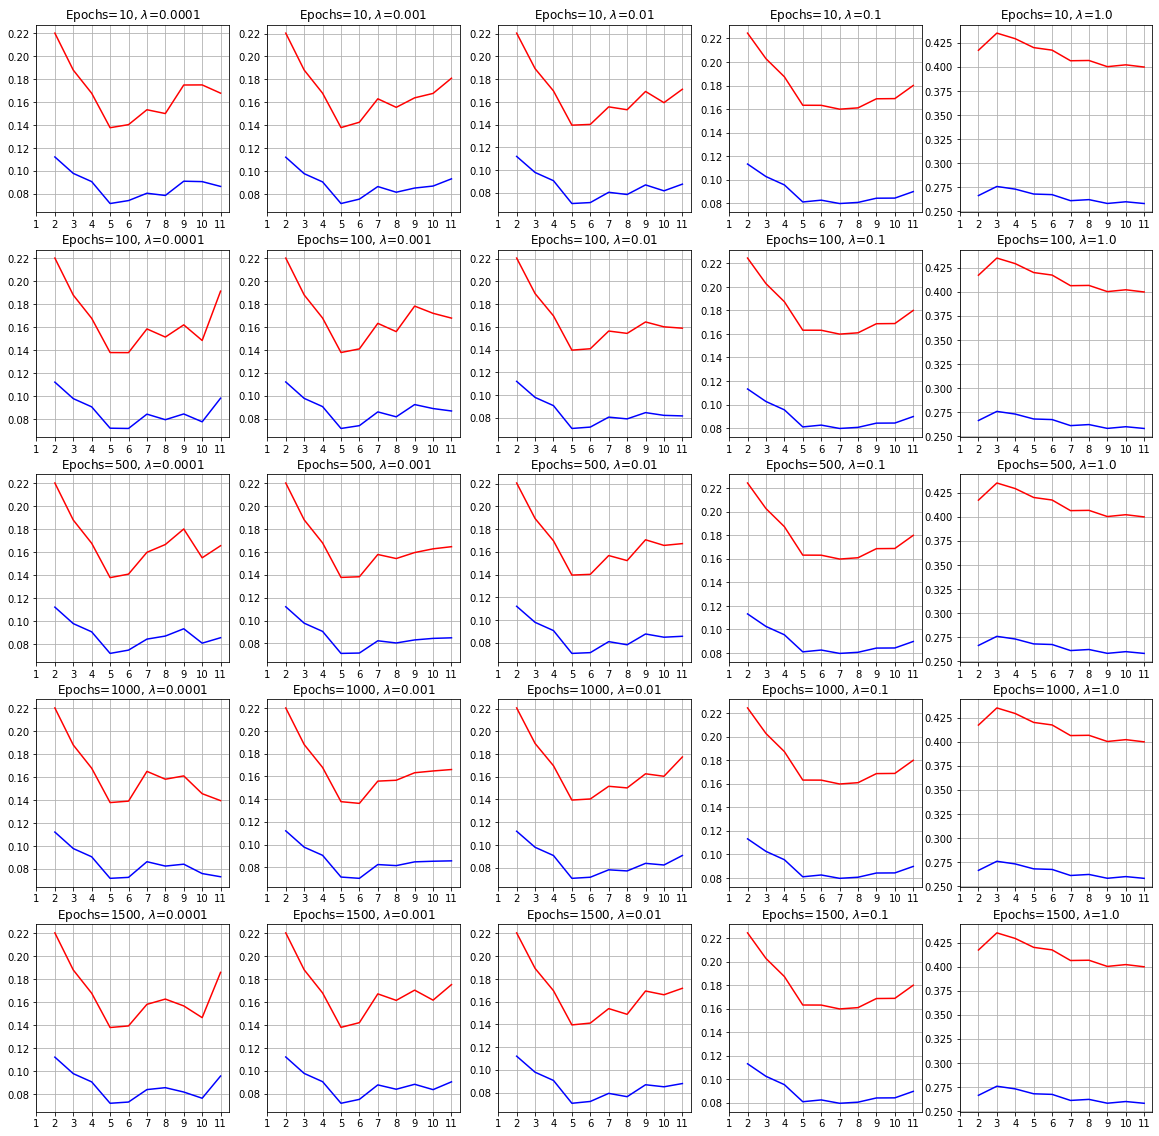

In [284]:
M = np.arange(2,12,1)
# lamb = 0.1

lambs = [0.0001, 0.001, 0.01, 0.1, 1.0]
# lambs = np.logspace(-200, -1, num=20)
# lambs = [1e-50, 1e-20, 1e-10, 1e-5, 1e-3]
EPOCHS = [10, 100, 500, 1000, 1500]
# EPOCHS = [1, 5]
# EPOCHS = [1, 3, 5, 7, 9]
EPOCHS = np.arange(100, 20000, 100)
E_train = []
E_test = []

for niter in EPOCHS:
    






figure, axes = plt.subplots(nrows=len(EPOCHS), ncols=len(lambs), figsize=(20,20))

for idx_ep, n_epochs in enumerate(EPOCHS):
    for idx_lm, lamb in enumerate(lambs):
        E_rms_train = []
        E_rms_test = []

        train_X = train_X_st
        test_X = test_X_st
        train_y = train_y_st
        test_y = test_y_st

        N = len(train_X)

        norm_sub = []
        norm_div = []
        norm_mean = []

        norm_sub.append(train_X.min())
        norm_div.append(train_X.max() - train_X.min())
        temp_X = (train_X - norm_sub[-1])/norm_div[-1]
        norm_mean.append(temp_X.mean())
        train_X = temp_X - norm_mean[-1]

        test_X = ((test_X - norm_sub[-1])/norm_div[-1]) - norm_mean[-1]

        temp_X_train = train_X
        X_new_train = train_X

        temp_X_test = test_X
        X_new_test = test_X


        for m in M:
            temp_X_train = temp_X_train*train_X
    
            norm_sub.append(temp_X_train.min())
            norm_div.append(temp_X_train.max() - temp_X_train.min())
            temp_X_train = (temp_X_train - norm_sub[-1])/norm_div[-1]
            norm_mean.append(temp_X_train.mean())
            temp_X_train = temp_X_train - norm_mean[-1]
            X_new_train = np.c_[X_new_train, temp_X_train]

            temp_X_test = temp_X_test*test_X
            temp_X_test = ((temp_X_test - norm_sub[-1])/norm_div[-1]) - norm_mean[-1]
            X_new_test = np.c_[X_new_test, temp_X_test]

            X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]
            X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]

            wt = np.random.randn(m+1,1)
            batch_size = 25
            for niter in range(1500):
                for i in range(0, N, batch_size):
                    X_i = X_fin_train[i:i+batch_size]
                    y_i = train_y[i:i+batch_size]
                    #print(X_i.shape[0])
                    lr = 0.3/(i+0.17)
                    wt = update_weights(X_i, y_i, wt, lr, lamb)

            theta_best = wt
            y_hat_train = X_fin_train.dot(theta_best)
            temp_val_train = sum((y_hat_train-train_y)**2)
            temp_val_train/=len(train_y)
            E_rms_train.append(temp_val_train)

            y_hat_test = X_fin_test.dot(theta_best)
            temp_val_test = sum((y_hat_test-test_y)**2)
            temp_val_test/=len(test_y)
            E_rms_test.append(temp_val_test) 
#             if (m==5):
#                 bestwt = theta_best
#                 bestm = m

        axes[idx_ep, idx_lm].plot(M, E_rms_train, "b-", label="Training Error")
        axes[idx_ep, idx_lm].plot(M, E_rms_test, "r-", label="Test Error")
        xticks = np.arange(1, max(M)+1, 1)
        axes[idx_ep, idx_lm].set_xticks(xticks)
        axes[idx_ep, idx_lm].grid()
        axes[idx_ep, idx_lm].set_title(r"Epochs=%s, $\lambda$=%s"%(n_epochs, lamb))
#         print("Training error at m=5 = %s, Test error = %s"%(E_rms_train, E_rms_test))
# figure.legend(('Training Error', 'Test Error'), 'upper left')
plt.savefig('epoch_lambda_100.png')
plt.show() 

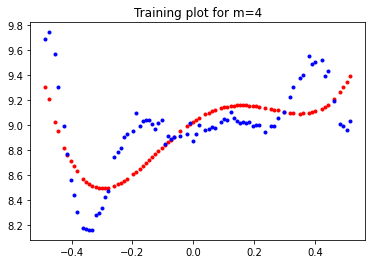

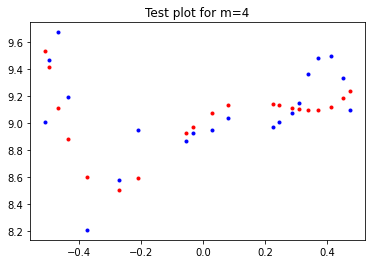

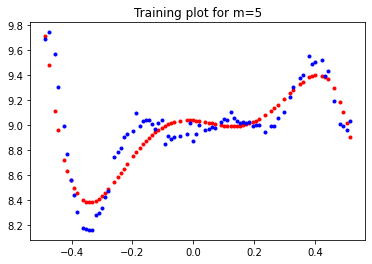

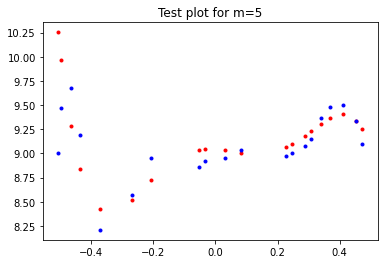

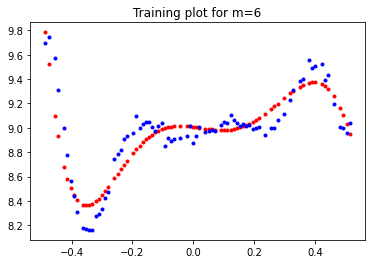

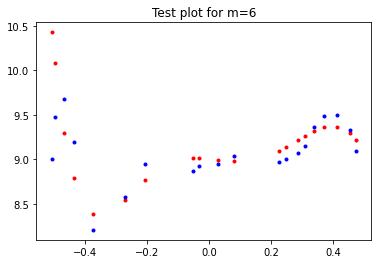

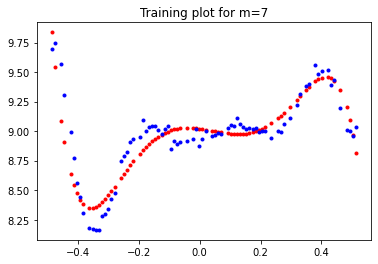

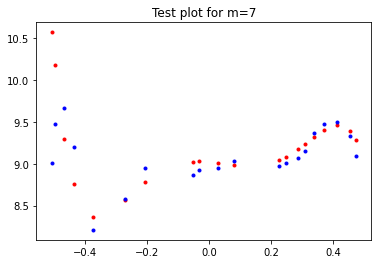

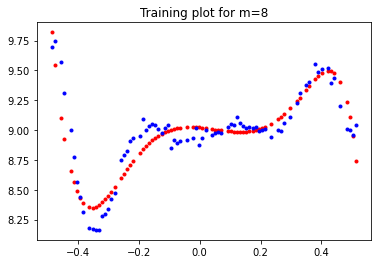

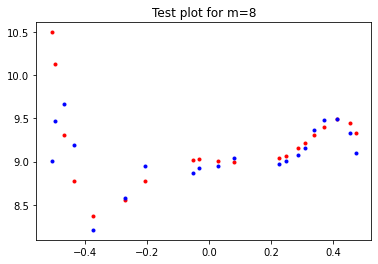

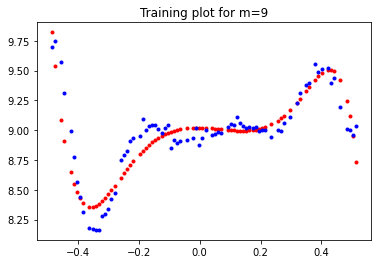

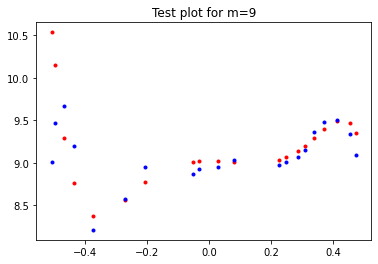

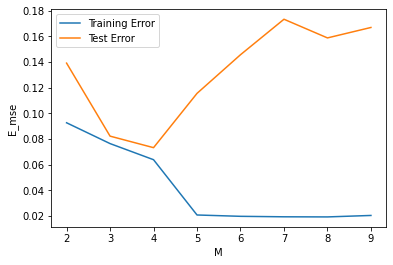

In [339]:
M = np.arange(2, 10, 1)
lamb=0.0001
BS = np.arange(35, 36, 1)
epochs = 1500


train_X = train_X_st
test_X = test_X_st
train_y = train_y_st
test_y = test_y_st

N = len(train_X)

norm_sub = []
norm_div = []
norm_mean = []

norm_sub.append(train_X.min())
norm_div.append(train_X.max() - train_X.min())
temp_X = (train_X - norm_sub[-1])/norm_div[-1]
norm_mean.append(temp_X.mean())
train_X = temp_X - norm_mean[-1]

test_X = ((test_X - norm_sub[-1])/norm_div[-1]) - norm_mean[-1]

temp_X_train = train_X
X_new_train = train_X

temp_X_test = test_X
X_new_test = test_X


E_train = []
E_test = []

# lr = 0.0001

for m in M:
    temp_X_train = temp_X_train*train_X
    
    norm_sub.append(temp_X_train.min())
    norm_div.append(temp_X_train.max() - temp_X_train.min())
    temp_X_train = (temp_X_train - norm_sub[-1])/norm_div[-1]
    norm_mean.append(temp_X_train.mean())
    temp_X_train = temp_X_train - norm_mean[-1]
    X_new_train = np.c_[X_new_train, temp_X_train]

    #norm = (temp_X_train - temp_X_train.min()) / (temp_X_train.max() - temp_X_train.min())
    #temp_X_train = norm - np.mean(norm)
    
    temp_X_test = temp_X_test*test_X
    temp_X_test = ((temp_X_test - norm_sub[-1])/norm_div[-1]) - norm_mean[-1]
    X_new_test = np.c_[X_new_test, temp_X_test]


    X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]
    X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]


    for batch_size in BS:   
        wt = np.random.randn(m+1,1)

        for niter in range(epochs):
            for i in range(0, N, batch_size):
                X_i = X_fin_train[i:i+batch_size]
                y_i = train_y[i:i+batch_size]
    #             print(X_i.shape[0])
                lr = 0.3/(i+0.17)
                wt = update_weights(X_i, y_i, wt, lr, lamb)

        theta_best = wt
        y_hat_train = X_fin_train.dot(theta_best)
        err = sum((y_hat_train-train_y)**2)
        err/=len(train_y)
        E_train.append(err)

        if (m>=4):
            plt.plot(train_X, y_hat_train, "r.")
            plt.plot(train_X, train_y, "b.")
            plt.title("Training plot for m=%s"%(m))
            plt.show()

        y_hat_test = X_fin_test.dot(theta_best)
        err = sum((y_hat_test-test_y)**2)
        err/=len(test_y)
        E_test.append(err)
        
        if (m>=4):
            plt.plot(test_X, y_hat_test, "r.")
            plt.plot(test_X, test_y, "b.")
            plt.title("Test plot for m=%s"%(m))
            plt.show()
    
plt.plot(M, E_train, label="Training Error")
plt.plot(M, E_test, label="Test Error")
plt.legend(loc="upper left")
plt.xlabel("M")
plt.xticks(M)
plt.ylabel("E_mse")
plt.show()
# print(*theta_best)

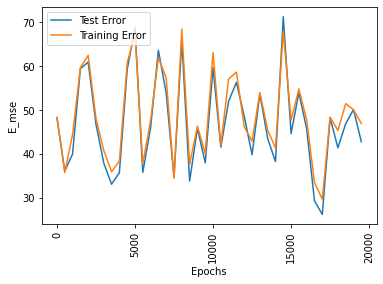

In [340]:
M = np.arange(2, 6, 1)
EPOCHS = np.arange(0, 20000, 500)
train_X = train_X_st
test_X = test_X_st
train_y = train_y_st
test_y = test_y_st

N = len(train_X)

norm_sub = []
norm_div = []
norm_mean = []

norm_sub.append(train_X.min())
norm_div.append(train_X.max() - train_X.min())
temp_X = (train_X - norm_sub[-1])/norm_div[-1]
norm_mean.append(temp_X.mean())
train_X = temp_X - norm_mean[-1]

test_X = ((test_X - norm_sub[-1])/norm_div[-1]) - norm_mean[-1]

temp_X_train = train_X
X_new_train = train_X

temp_X_test = test_X
X_new_test = test_X


E_train = []
E_test = []

# lr = 0.0001

lamb=0.0001
batch_size = 32

for m in M:
    temp_X_train = temp_X_train*train_X
    
    norm_sub.append(temp_X_train.min())
    norm_div.append(temp_X_train.max() - temp_X_train.min())
    temp_X_train = (temp_X_train - norm_sub[-1])/norm_div[-1]
    norm_mean.append(temp_X_train.mean())
    temp_X_train = temp_X_train - norm_mean[-1]
    X_new_train = np.c_[X_new_train, temp_X_train]

    #norm = (temp_X_train - temp_X_train.min()) / (temp_X_train.max() - temp_X_train.min())
    #temp_X_train = norm - np.mean(norm)
    
    temp_X_test = temp_X_test*test_X
    temp_X_test = ((temp_X_test - norm_sub[-1])/norm_div[-1]) - norm_mean[-1]
    X_new_test = np.c_[X_new_test, temp_X_test]


X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]
X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]


for niter in EPOCHS:   
    wt = np.random.randn(m+1,1)

    for i in range(0, N, batch_size):
        X_i = X_fin_train[i:i+batch_size]
        y_i = train_y[i:i+batch_size]
#             print(X_i.shape[0])
        lr = 0.3/(i+0.17)
        wt = update_weights(X_i, y_i, wt, lr, lamb)

    theta_best = wt
    y_hat_train = X_fin_train.dot(theta_best)
    err = sum((y_hat_train-train_y)**2)
    err/=len(train_y)
    E_train.append(err)


    y_hat_test = X_fin_test.dot(theta_best)
    err = sum((y_hat_test-test_y)**2)
    err/=len(test_y)
    E_test.append(err)
    
plt.plot(EPOCHS, E_test, label="Test Error")
plt.plot(EPOCHS, E_train, label="Training Error")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.xticks(np.arange(0, 20001, 5000), rotation=90)
plt.ylabel("E_mse")
plt.show()
# print(*theta_best)